In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
tn10p_1960_1990 = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/EES405_shiv1/tn10p.1960.1990.nc')
tn10p_1960_2020 = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/EES405_shiv1/tn10p.1960.2020.nc')

tn10p_1960_1990 = tn10p_1960_1990.squeeze()
tn10p_1960_2020 = tn10p_1960_2020.squeeze()


In [3]:
tn10p_1960_2020

<xarray.Dataset>
Dimensions:                                                      (
                                                                  longitude: 1440,
                                                                  latitude: 721)
Coordinates:
    time                                                         datetime64[ns] ...
  * longitude                                                    (longitude) float32 ...
  * latitude                                                     (latitude) float32 ...
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 22:12:51 2023: cdo -eca_tn10p -selyear,1960/2020...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [4]:
tn10p = tn10p_1960_2020 - tn10p_1960_1990

In [5]:
tn10p

<xarray.Dataset>
Dimensions:                                                      (
                                                                  longitude: 1440,
                                                                  latitude: 721)
Coordinates:
  * longitude                                                    (longitude) float32 ...
  * latitude                                                     (latitude) float32 ...
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (latitude, longitude) float32 ...

In [6]:
tn10p.variables

Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'cold_nights_percent_wrt_10th_percentile_of_reference_period': <xarray.Variable (latitude: 721, longitude: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [1.021225  

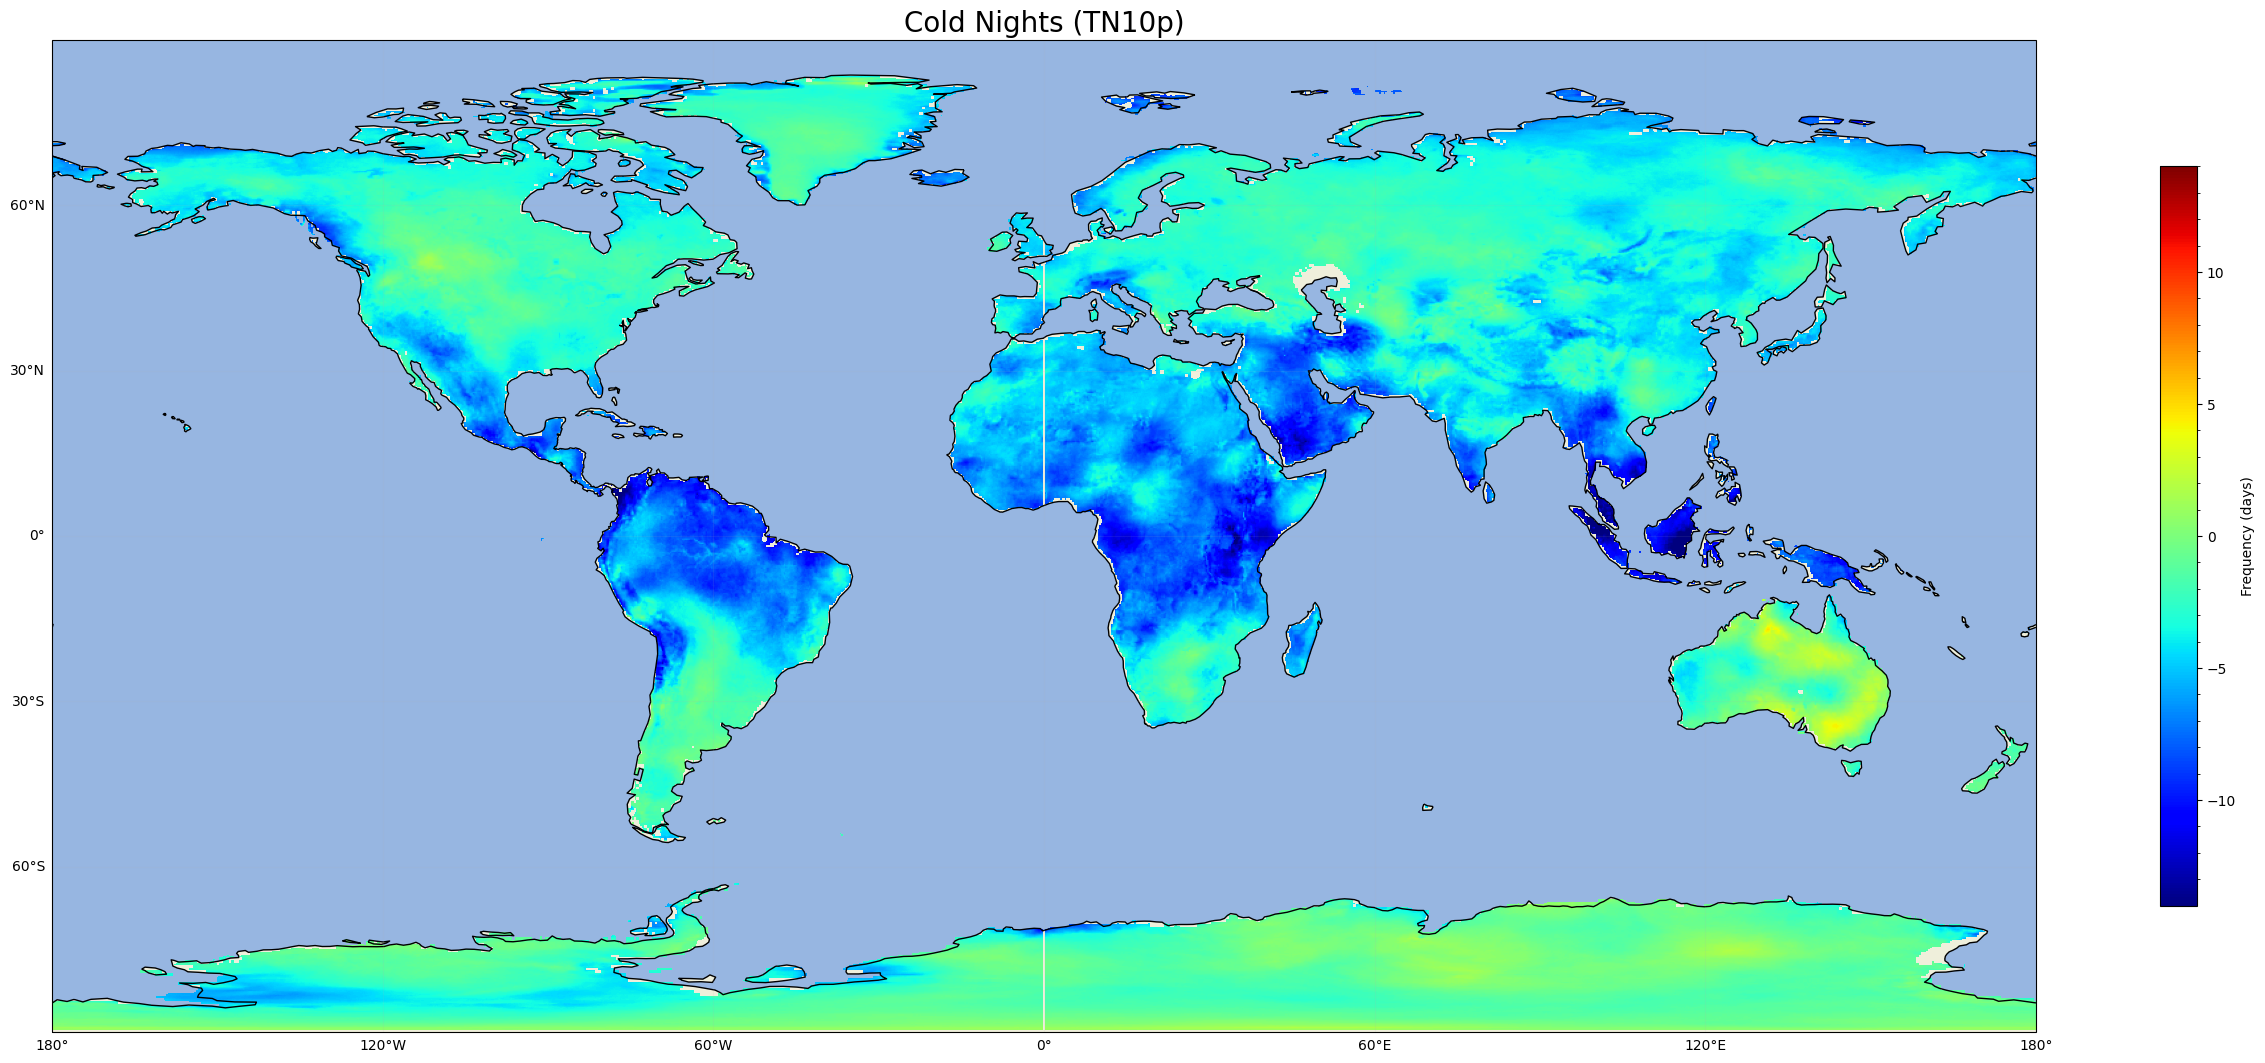

In [7]:
data_array = np.asarray(tn10p['cold_nights_percent_wrt_10th_percentile_of_reference_period'])
lon = tn10p.longitude
lat = tn10p.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(data_array,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper', vmax=14, vmin=-14)
plt.title('Cold Nights (TN10p)',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency (days)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_nights.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
cold_nights_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/timeseries/cold_nights_timeseries.nc').squeeze()

In [9]:
cold_nights_timeseries

<xarray.Dataset>
Dimensions:                                                      (time: 60)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:44:38 2023: cdo -fldmean -mergetime cold_nigh...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [10]:
cold_nights_timeseries.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 60)>
array(['1961-12-31T11:00:00.000000000', '1962-12-31T11:00:00.000000000',
       '1963-12-31T11:00:00.000000000', '1964-12-31T11:00:00.000000000',
       '1965-12-31T11:00:00.000000000', '1966-12-31T11:00:00.000000000',
       '1967-12-31T11:00:00.000000000', '1968-12-31T11:00:00.000000000',
       '1969-12-31T11:00:00.000000000', '1970-12-31T11:00:00.000000000',
       '1971-12-31T11:00:00.000000000', '1972-12-31T11:00:00.000000000',
       '1973-12-31T11:00:00.000000000', '1974-12-31T11:00:00.000000000',
       '1975-12-31T11:00:00.000000000', '1976-12-31T11:00:00.000000000',
       '1977-12-31T11:00:00.000000000', '1978-12-31T11:00:00.000000000',
       '1979-12-31T11:00:00.000000000', '1980-12-31T11:00:00.000000000',
       '1981-12-31T11:00:00.000000000', '1982-12-31T11:00:00.000000000',
       '1983-12-31T11:00:00.000000000', '1984-12-31T11:00:00.000000000',
       '1985-12-31T11:00:00.000000000', '1986-12-31T11:00:00.000000

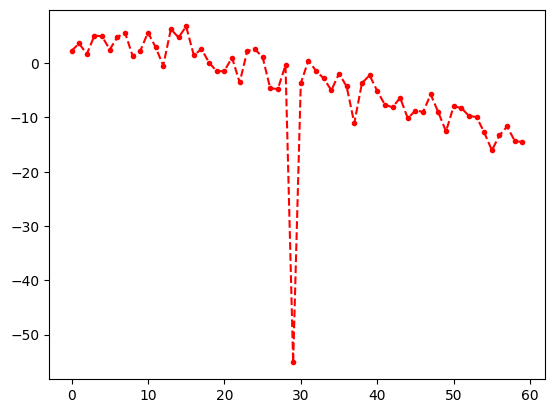

In [11]:
plt.plot(cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--')

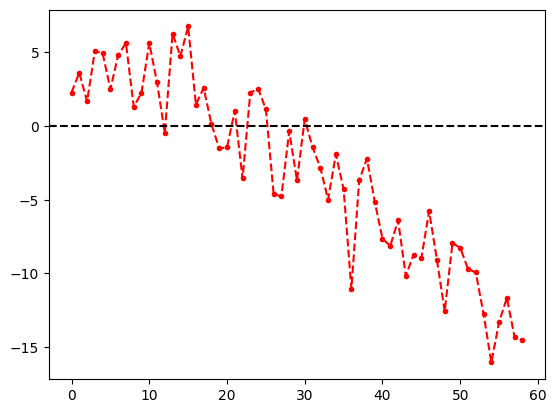

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries.where((cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Plot the filtered data with a red dashed line
plt.plot(filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# Show the plot
plt.show()


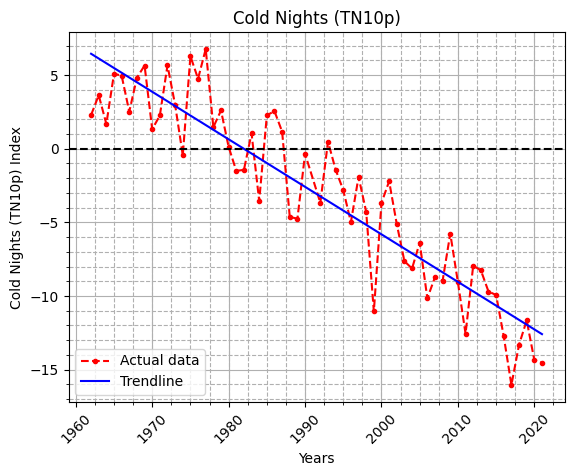

Text(0.05, 0.95, '3.86e+00 x^1 + -8.83e-04')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries.where((cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 1)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_nights_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


2.93e+00 x^20 + -2.68e-03 x^19 + 1.87e-06 x^18 + 2.20e-09 x^17 + -1.11e-12 x^16 + -4.43e-16 x^15 + 2.92e-19 x^14 + -1.05e-24 x^13 + -2.91e-26 x^12 + 6.97e-30 x^11 + 2.79e-35 x^10 + -3.35e-37 x^9 + 8.48e-41 x^8 + -1.20e-44 x^7 + 1.14e-48 x^6 + -7.67e-53 x^5 + 3.67e-57 x^4 + -1.24e-61 x^3 + 2.79e-66 x^2 + -3.78e-71 x^1 + 2.34e-76

In [14]:
cold_days_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/timeseries/cold_days_timeseries.nc').squeeze()

In [15]:
cold_days_timeseries

<xarray.Dataset>
Dimensions:                                                         (time: 60)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
    lon                                                             float64 0.0
    lat                                                             float64 0.0
Data variables:
    very_cold_days_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:28:03 2023: cdo -fldmean -mergetime cold_day-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [16]:
cold_days_timeseries.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 60)>
array(['1961-12-31T11:00:00.000000000', '1962-12-31T11:00:00.000000000',
       '1963-12-31T11:00:00.000000000', '1964-12-31T11:00:00.000000000',
       '1965-12-31T11:00:00.000000000', '1966-12-31T11:00:00.000000000',
       '1967-12-31T11:00:00.000000000', '1968-12-31T11:00:00.000000000',
       '1969-12-31T11:00:00.000000000', '1970-12-31T11:00:00.000000000',
       '1971-12-31T11:00:00.000000000', '1972-12-31T11:00:00.000000000',
       '1973-12-31T11:00:00.000000000', '1974-12-31T11:00:00.000000000',
       '1975-12-31T11:00:00.000000000', '1976-12-31T11:00:00.000000000',
       '1977-12-31T11:00:00.000000000', '1978-12-31T11:00:00.000000000',
       '1979-12-31T11:00:00.000000000', '1980-12-31T11:00:00.000000000',
       '1981-12-31T11:00:00.000000000', '1982-12-31T11:00:00.000000000',
       '1983-12-31T11:00:00.000000000', '1984-12-31T11:00:00.000000000',
       '1985-12-31T11:00:00.000000000', '1986-12-31T11:00:00.000000

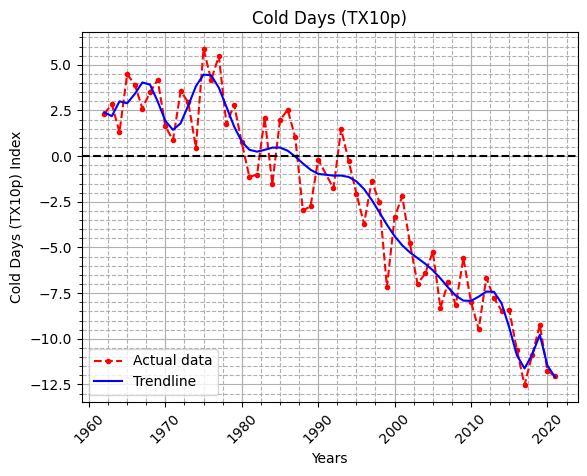

Text(0.05, 0.95, '1.93e+00 x^20 + -2.37e-03 x^19 + 2.30e-06 x^18 + 1.93e-09 x^17 + -1.20e-12 x^16 + -3.60e-16 x^15 + 2.88e-19 x^14 + -9.51e-24 x^13 + -2.71e-26 x^12 + 7.05e-30 x^11 + -7.42e-35 x^10 + -3.18e-37 x^9 + 8.38e-41 x^8 + -1.21e-44 x^7 + 1.16e-48 x^6 + -7.86e-53 x^5 + 3.78e-57 x^4 + -1.27e-61 x^3 + 2.86e-66 x^2 + -3.87e-71 x^1 + 2.39e-76')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_days_timeseries.where((cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'], 20)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [18]:
warm_nights_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/timeseries/warm_nights_timeseries.nc').squeeze()

In [19]:
warm_nights_timeseries

<xarray.Dataset>
Dimensions:                                                      (time: 60)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Apr 02 08:37:25 2023: cdo fldmean warm_nights_timeserie...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

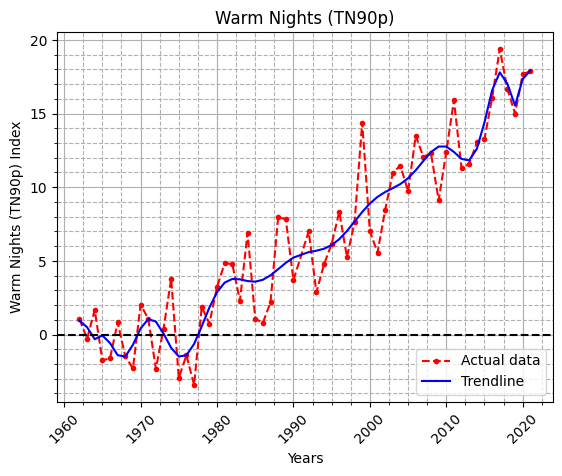

Text(0.05, 0.95, '4.11e-01 x^20 + 2.67e-03 x^19 + -1.86e-06 x^18 + -2.18e-09 x^17 + 1.11e-12 x^16 + 4.38e-16 x^15 + -2.89e-19 x^14 + 1.13e-24 x^13 + 2.87e-26 x^12 + -6.89e-30 x^11 + -2.43e-35 x^10 + 3.31e-37 x^9 + -8.38e-41 x^8 + 1.19e-44 x^7 + -1.13e-48 x^6 + 7.61e-53 x^5 + -3.65e-57 x^4 + 1.23e-61 x^3 + -2.78e-66 x^2 + 3.78e-71 x^1 + -2.34e-76')

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries.where((warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 20)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/warm_nights_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))



# plt.show()

In [21]:
warm_days_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/timeseries/warm_days_timeseries.nc').squeeze()

In [22]:
warm_days_timeseries

<xarray.Dataset>
Dimensions:                                                         (time: 60)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
    lon                                                             float64 0.0
    lat                                                             float64 0.0
Data variables:
    very_warm_days_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:28:39 2023: cdo -fldmean -mergetime warm_day-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

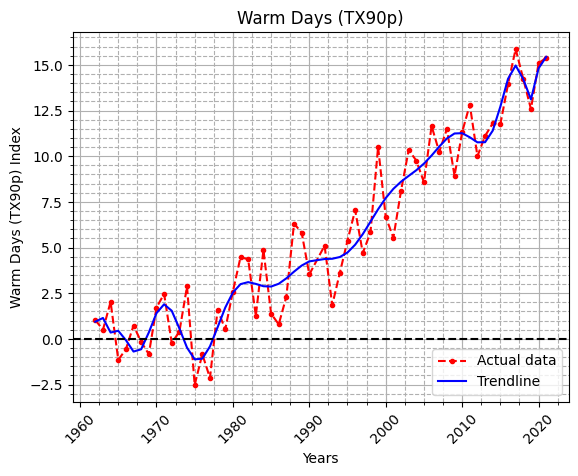

Text(0.05, 0.95, '1.41e+00 x^20 + 2.36e-03 x^19 + -2.29e-06 x^18 + -1.91e-09 x^17 + 1.19e-12 x^16 + 3.55e-16 x^15 + -2.85e-19 x^14 + 9.58e-24 x^13 + 2.67e-26 x^12 + -6.98e-30 x^11 + 7.78e-35 x^10 + 3.13e-37 x^9 + -8.28e-41 x^8 + 1.20e-44 x^7 + -1.15e-48 x^6 + 7.81e-53 x^5 + -3.76e-57 x^4 + 1.27e-61 x^3 + -2.86e-66 x^2 + 3.87e-71 x^1 + -2.39e-76')

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_days_timeseries.where((warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'], 20)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Days (TX90p) Index')
ax.set_title('Warm Days (TX90p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/warm_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))
